In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import review_analyzer.config as rt
import pandas as pd
import json

Dataset:
https://arxiv.org/abs/2005.00547

In [3]:
go_emotions_df = pd.read_csv(rt.EXTERNAL / 'go_emotions_dataset.csv')

In [5]:
go_emotions_df

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,ee6pagw,Everyone likes [NAME].,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,ef28nod,Well when you’ve imported about a gazillion of...,False,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
211222,ee8hse1,That looks amazing,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211223,edrhoxh,The FDA has plenty to criticize. But like here...,False,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
go_emotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    211225 non-null  object
 1   text                  211225 non-null  object
 2   example_very_unclear  211225 non-null  bool  
 3   admiration            211225 non-null  int64 
 4   amusement             211225 non-null  int64 
 5   anger                 211225 non-null  int64 
 6   annoyance             211225 non-null  int64 
 7   approval              211225 non-null  int64 
 8   caring                211225 non-null  int64 
 9   confusion             211225 non-null  int64 
 10  curiosity             211225 non-null  int64 
 11  desire                211225 non-null  int64 
 12  disappointment        211225 non-null  int64 
 13  disapproval           211225 non-null  int64 
 14  disgust               211225 non-null  int64 
 15  embarrassment    

In [7]:
go_emotions_df.columns

Index(['id', 'text', 'example_very_unclear', 'admiration', 'amusement',
       'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
       'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral'],
      dtype='object')

In [8]:
print("Textos únicos:", go_emotions_df['text'].nunique())
print("IDs únicos:", go_emotions_df['id'].nunique())


Textos únicos: 57732
IDs únicos: 58011


In [9]:
etiquetas = go_emotions_df.drop(columns=['id', 'example_very_unclear', 'text'])
grouped = go_emotions_df.groupby('text')[etiquetas.columns.tolist()].agg('sum')

In [10]:
grouped.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
text,,,,,,,,,,,,,,,,,,,,,
"""If you don't wear BROWN AND ORANGE...YOU DON'T MATTER!"" We need a tshirt with that on it asap!",0,0,1,2,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
"""What do Scottish people look like?"" How I would love to have been there to take a swing at that softball.",0,0,0,0,0,0,0,3,0,0,...,2,0,0,0,0,0,0,0,0,0
"### A surprise, to be sure, but a welcome one",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
"'*Pray*, v. To ask that the laws of the universe be annulled in behalf of a single petitioner, confessedly unworthy.' — [NAME]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
">it'll get invaded by tankie, unfortunately. How apropos.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [11]:
multilabel = grouped[grouped.sum(axis=1) > 1]
multilabel.shape[0]

57618

In [12]:
grouped['n_labels'] = grouped.sum(axis=1)

In [13]:
grouped.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,n_labels
text,,,,,,,,,,,,,,,,,,,,,
"""If you don't wear BROWN AND ORANGE...YOU DON'T MATTER!"" We need a tshirt with that on it asap!",0,0,1,2,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,7
"""What do Scottish people look like?"" How I would love to have been there to take a swing at that softball.",0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,5
"### A surprise, to be sure, but a welcome one",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,3
"'*Pray*, v. To ask that the laws of the universe be annulled in behalf of a single petitioner, confessedly unworthy.' — [NAME]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
">it'll get invaded by tankie, unfortunately. How apropos.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [14]:
multilabel_texts = grouped[grouped['n_labels'] > 1]
multilabel_sample = multilabel_texts.merge(go_emotions_df[['text']], on='text').drop_duplicates('text')

In [15]:
sample = multilabel_sample.sample(10, random_state=42)
sample.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,n_labels
109755,No worries! 😊,0,0,0,0,2,2,0,0,0,...,0,0,0,0,1,0,0,0,0,5
87992,"It won't be anything with ""Last"" in it, becaus...",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4
204248,now I kinda wish [NAME] wasn't an imaginary ca...,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4
174944,Why did I read “roommate” in the title as “com...,0,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,4
133009,Someone said earlier today in the other thread...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3


In [16]:
filtered = go_emotions_df[go_emotions_df['text'].isin(sample['text'])]

In [17]:
from IPython.display import display

with pd.option_context('display.max_columns', None,
                       'display.max_colwidth', None,
                       'display.max_rows', 100):
    display(filtered)

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
3508,edxojwp,He's transcended fuck-you-money to fuck-me-money territory,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5150,ef8tpl2,Why did I read “roommate” in the title as “comerade.” How many memes have I viewed?!,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6299,ef8j5p0,This is not unique to [RELIGION]. There are various sects and denominations in every world religion.,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9349,edxojwp,He's transcended fuck-you-money to fuck-me-money territory,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10966,ee6g3c1,You mean...I **don't** have to be #blessed and #thankful that I am moving to another country at the end of this month?,False,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21795,edv80yp,"It won't be anything with ""Last"" in it, because TLJ. But it miiiiight be something with ""Final"" in it.",False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22826,edu9rid,Oh [NAME] 😍,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
28589,ee6g3c1,You mean...I **don't** have to be #blessed and #thankful that I am moving to another country at the end of this month?,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
33177,ef8j5p0,This is not unique to [RELIGION]. There are various sects and denominations in every world religion.,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
35513,edu9rid,Oh [NAME] 😍,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
filtered.head()

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
3508,edxojwp,He's transcended fuck-you-money to fuck-me-mon...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5150,ef8tpl2,Why did I read “roommate” in the title as “com...,False,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6299,ef8j5p0,This is not unique to [RELIGION]. There are va...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9349,edxojwp,He's transcended fuck-you-money to fuck-me-mon...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10966,ee6g3c1,You mean...I **don't** have to be #blessed and...,False,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dudosos = go_emotions_df[go_emotions_df['example_very_unclear']==True]
emotion_cols = go_emotions_df.columns.difference(['id', 'text', 'example_very_unclear'])
(dudosos[emotion_cols].sum(axis=1)>0).sum()

np.int64(0)

In [20]:
go_emotions_df.shape

(211225, 31)

In [4]:
clean_df = go_emotions_df[go_emotions_df['example_very_unclear']==False]
emotion_cols = go_emotions_df.columns.difference(['id', 'text', 'example_very_unclear'])
clean_df = clean_df[clean_df[emotion_cols].sum(axis=1) > 0]
print("Filas limpias y usables para entrenamiento:", clean_df.shape[0])

Filas limpias y usables para entrenamiento: 207814


In [22]:
clean_df.columns

Index(['id', 'text', 'example_very_unclear', 'admiration', 'amusement',
       'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
       'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral'],
      dtype='object')

Verificar conflictos

In [23]:
import review_analyzer.plots as pt

In [24]:
conflicto_df = clean_df[(clean_df['joy'] == 1) & (clean_df['sadness'] == 1)]
pt.show_full_dataset(conflicto_df[['text', 'joy', 'sadness']].sample(10, random_state=42))

,text,joy,sadness
8369,Yeah but being happy at other misfortune is sowing bad karma for yourself.,1,1
94071,I miss the bch/bsv war...the quality of posts were getting better....back to square 1,1,1
33570,"i don't usually 'wall of text' posts but i'm glad i made your post an exception. thank you, it brought tears to my eyes.",1,1
29,So happy for [NAME]. So sad he's not here. Imagine this team with [NAME] instead of [NAME]. Ugh.,1,1
123862,I am sad to hear about your cat. Pets become like a family member. I am glad to hear you are doing better.,1,1
125767,Way too tired for work today so taking the day off. Feels pretty great!,1,1
170962,"with his luxurious salary, nice pension and zero accountability for anything it does, its a hard old life!!!",1,1
135141,Two overtime games on championship Sunday? We are blessed as football fans. Too bad one game had to be between FYTB and FUKC,1,1
130976,Here's a purple heart for you recapping that! OMG matching romantic scoots I'm cryin',1,1
87011,"Ah I see, thanks. I struggle with the order of the sentences in English from time to time, so I'm glad for any help :)",1,1


Fuente: Desmet, S., Cer, D., Zhang, S., et al. (2020). GoEmotions: A Dataset of Fine-Grained Emotions. Google Research. https://arxiv.org/abs/2005.00547

In [25]:
clean_df.shape

(207814, 31)

In [26]:
clean_df['text'].nunique()

57730

In [27]:
emotion_cols

Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'neutral', 'optimism', 'pride',
       'realization', 'relief', 'remorse', 'sadness', 'surprise'],
      dtype='object')

In [28]:
df_text = clean_df.groupby('text')[emotion_cols].max()
emotion_counts = df_text.sum().sort_values(ascending=False)

emotion_counts

neutral           31446
approval          13235
annoyance         10024
admiration         9912
disapproval        8399
realization        7248
disappointment     6656
curiosity          6203
optimism           6199
joy                5688
anger              5644
confusion          5311
gratitude          5288
amusement          5180
sadness            4667
love               4347
excitement         4335
caring             4330
disgust            4053
surprise           3823
desire             2838
fear               2136
embarrassment      2003
remorse            1663
nervousness        1556
pride              1127
relief             1085
grief               558
dtype: int64

<Axes: title={'center': 'Frecuencia de cada emoción'}>

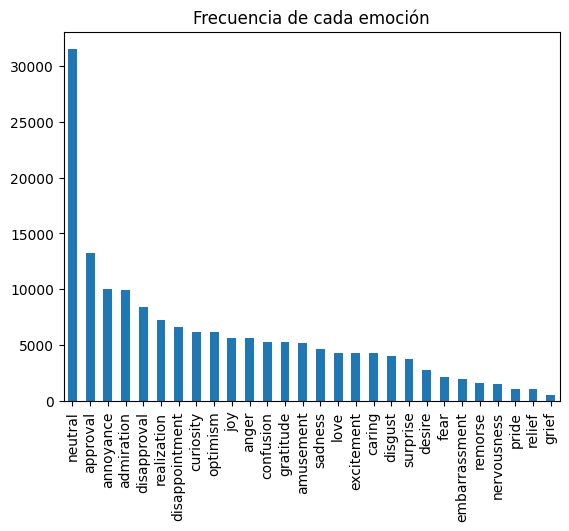

In [29]:
emotion_counts.plot(kind='bar', title='Frecuencia de cada emoción')

<Axes: title={'center': 'Número de emociones por texto'}, xlabel='n_labels'>

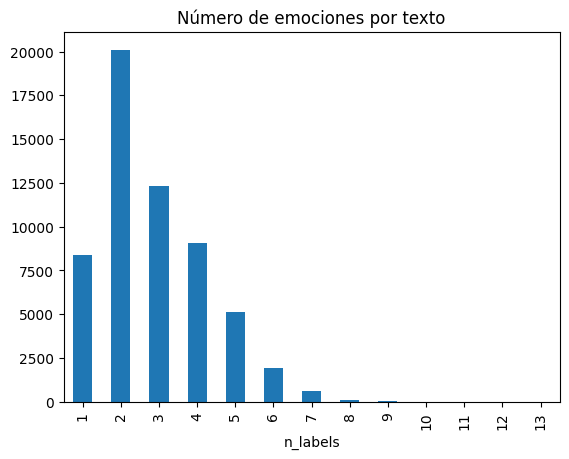

In [30]:
df_text['n_labels'] = df_text.sum(axis=1)
df_text['n_labels'].value_counts().sort_index().plot(kind='bar', title='Número de emociones por texto')

In [31]:
df_text['n_labels'].value_counts()

n_labels
2     20098
3     12320
4      9045
1      8379
5      5147
6      1953
7       604
8       130
9        36
10       10
11        4
12        2
13        2
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlación entre emociones')

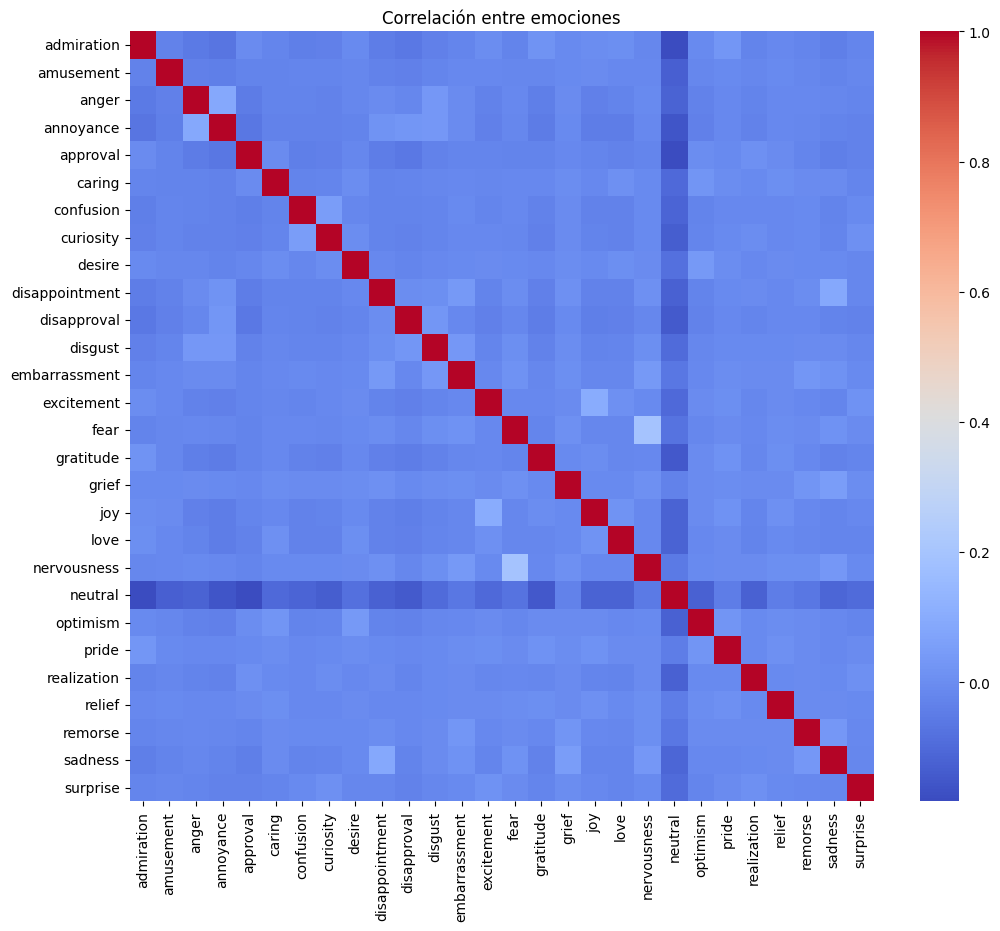

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = clean_df[emotion_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlación entre emociones")

In [33]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207814 entries, 0 to 211223
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    207814 non-null  object
 1   text                  207814 non-null  object
 2   example_very_unclear  207814 non-null  bool  
 3   admiration            207814 non-null  int64 
 4   amusement             207814 non-null  int64 
 5   anger                 207814 non-null  int64 
 6   annoyance             207814 non-null  int64 
 7   approval              207814 non-null  int64 
 8   caring                207814 non-null  int64 
 9   confusion             207814 non-null  int64 
 10  curiosity             207814 non-null  int64 
 11  desire                207814 non-null  int64 
 12  disappointment        207814 non-null  int64 
 13  disapproval           207814 non-null  int64 
 14  disgust               207814 non-null  int64 
 15  embarrassment         

In [34]:
df_text = clean_df.groupby('text')[emotion_cols].max()
df_text['n_labels'] = df_text.sum(axis=1)
ult_df = df_text.reset_index()


In [ ]:
ult_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise,n_labels
0,"""If you don't wear BROWN AND ORANGE...YOU DON...",0,0,1,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,5
1,"""What do Scottish people look like?"" How I wo...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
2,"### A surprise, to be sure, but a welcome one",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,"'*Pray*, v. To ask that the laws of the unive...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,">it'll get invaded by tankie, unfortunately. ...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [43]:
ult_df.shape

(57730, 30)

In [ ]:
ult_df[['text']].to_csv(rt.EXTERNAL / "go_emotions_dataset_to_translate.csv", index=False)

## Traducción

---

### Fuentes sobre mBART50

### 1. Paper de referencia

**Título:** [Multilingual Translation with Extensible Multilingual Pretraining and Finetuning](https://arxiv.org/abs/2008.00401)  
**Resumen:** Presenta mBART50 como un modelo de traducción multilingüe many-to-many, preentrenado en 50 idiomas con datos de CC25. Mejora el rendimiento en traducción directa entre lenguas sin depender del inglés como pivote.

### 2. Repositorio en Hugging Face

**Enlace:** [facebook/mbart-large-50-many-to-many-mmt](https://huggingface.co/facebook/mbart-large-50-many-to-many-mmt)  
**Descripción:** Modelo preentrenado multilingüe capaz de traducir directamente entre 50 idiomas. Optimizado con el benchmark FLORES-101, con buen desempeño en tareas de traducción informal y entre lenguas con pocos recursos.


In [36]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

In [37]:
import torch
from tqdm import tqdm

In [63]:
model_name = "facebook/mbart-large-50-many-to-many-mmt"

In [64]:
tokenizer = MBart50TokenizerFast.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)

In [65]:
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MBartForConditionalGeneration(
  (model): MBartModel(
    (shared): MBartScaledWordEmbedding(250054, 1024, padding_idx=1)
    (encoder): MBartEncoder(
      (embed_tokens): MBartScaledWordEmbedding(250054, 1024, padding_idx=1)
      (embed_positions): MBartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x MBartEncoderLayer(
          (self_attn): MBartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): ReLU()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
    

In [66]:
tokenizer.src_lang = "en_XX"
target_lang_token = "es_XX"

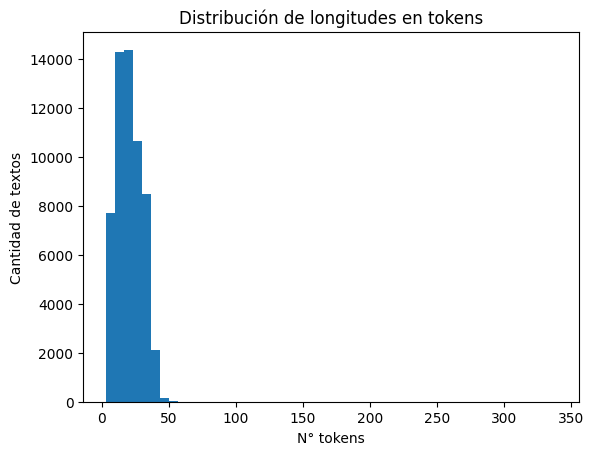

In [67]:
encoded = tokenizer(ult_df['text'].tolist(), truncation=False, padding=False)
lengths = [len(x) for x in encoded['input_ids']]

import matplotlib.pyplot as plt
plt.hist(lengths, bins=50)
plt.title("Distribución de longitudes en tokens")
plt.xlabel("N° tokens")
plt.ylabel("Cantidad de textos")
plt.show()


In [48]:
def translate_mbart(texts, batch_size=16, max_length=128):
    translations = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=max_length).to(device)
        generated_tokens = model.generate(
            **inputs,
            forced_bos_token_id=tokenizer.lang_code_to_id[target_lang_token],
            max_length=max_length
        )
        decoded = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
        translations.extend(decoded)
    return translations

In [53]:
sample_texts = ult_df['text'].sample(100, random_state=42).tolist()
sample_translations = translate_mbart(sample_texts)

100%|██████████| 7/7 [04:44<00:00, 40.69s/it]


In [54]:
for en, es in zip(sample_texts[:5], sample_translations[:5]):
    print(f"> EN: {en}\n> ES: {es}\n")

> EN: Wait until you try saying papi !
> ES: Espera hasta intentar decir papi!

> EN: You just defended him with a bunch of doublespeak bullshit so I’m gonna have to disagree. You’re a fucking idiot.
> ES: Usted acaba de defenderlo con una serie de burla de doble rasgo, así que tendré que estar en desacuerdo.

> EN: I don't know what's more embarrassing, the fact I watch the show or own a Roku TV.
> ES: No sé qué es más vergonzoso, el hecho de que vea el programa o posea una TV Roku.

> EN: It's just a human problem. I lose track of how many stories a month come out about some teacher getting caught sexually abusing 1-3 of her students.
> ES: Es simplemente un problema humano. Perdo el rastro de cuántos relatos por mes salen sobre una maestra que se encuentra atrapada abusando sexualmente de 1-3 de sus alumnos.

> EN: Your pro controller tho, tops.
> ES: Tu controlador pro tu, tops.



mBART traduce bien lo general, pero falla en lo coloquial, vulgar o sarcástico.

Censura insultos, suaviza tonos, y malinterpreta slang moderno.

No apto para traducción fina o expresiones emocionales complejas sin postproceso.

In [70]:
translated_df = pd.read_csv(rt.EXTERNAL / "go_emotions_dataset_translated.csv")

In [71]:
assert (translated_df['text'] == ult_df['text']).all(), "textos no coinciden exactamente"

In [72]:
ult_df['text_es'] = translated_df['text_es']

In [74]:
pt.show_full_dataset(ult_df[['text','text_es']])

,text,text_es
0,"""If you don't wear BROWN AND ORANGE...YOU DON'T MATTER!"" We need a tshirt with that on it asap!","""Si no llevas BROWN AND ORANGE...YO DON'T MATTER!"" Necesitamos una camiseta con esto en ella!"
1,"""What do Scottish people look like?"" How I would love to have been there to take a swing at that softball.","""Como son los escoceses?"" ¿Cómo me encantaría haber estado allí para dar un salto en ese softball."
2,"### A surprise, to be sure, but a welcome one","### Una sorpresa, sin duda, pero una bienvenida"
3,"'*Pray*, v. To ask that the laws of the universe be annulled in behalf of a single petitioner, confessedly unworthy.' — [NAME]","'*Pray*, v. Para pedir que las leyes del universo sean anuladas en nombre de un único peticionario, que admite que no es digno'. — [NAME]"
4,">it'll get invaded by tankie, unfortunately. How apropos.",">la invadirá el tankie, por desgracia."
...,...,...
57725,🤷🏻‍♀️ As a wise man once said: he was a bastard in life thus a bastard in death,Como un hombre sabio dijo una vez: él era un bastardo en la vida y así un bastardo en la muerte
57726,🤷🏼‍♀️ I was wondering the same thing. It looked almost like a teriyaki.,Me estaba preguntando lo mismo. Parecía casi como un teriyaki.
57727,🦀MY BABYS DEAD🦀,"En el párrafo 2 de su resolución 57/270 B, la Asamblea General pidió al Secretario General que le presentara, en su quincuagésimo séptimo período de sesiones, un informe sobre la aplicación de la presente resolución."
57728,🦀🦀🦀🦀🦀🦀🦀🦀🦀I’m bad at this game🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀,No estoy bien en este juego


In [133]:
ult_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,neutral,optimism,pride,realization,relief,remorse,sadness,surprise,n_labels,text_es
0,"""If you don't wear BROWN AND ORANGE...YOU DON...",0,0,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,5,"""Si no llevas BROWN AND ORANGE...YO DON'T MATT..."
1,"""What do Scottish people look like?"" How I wo...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,"""Como son los escoceses?"" ¿Cómo me encantaría ..."
2,"### A surprise, to be sure, but a welcome one",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,"### Una sorpresa, sin duda, pero una bienvenida"
3,"'*Pray*, v. To ask that the laws of the unive...",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,"'*Pray*, v. Para pedir que las leyes del unive..."
4,">it'll get invaded by tankie, unfortunately. ...",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,">la invadirá el tankie, por desgracia."


In [134]:
ult_df.to_csv(rt.EXTERNAL / "goemotions_multilabel_es.csv", index=False)

In [5]:
ult_df = pd.read_csv(rt.EXTERNAL / "goemotions_multilabel_es.csv")

In [6]:
from datasets import Dataset

In [7]:
emotion_cols

Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'neutral', 'optimism', 'pride',
       'realization', 'relief', 'remorse', 'sadness', 'surprise'],
      dtype='object')

In [8]:
emotion_cols = list(emotion_cols)

In [9]:
hf_dataset = Dataset.from_pandas(ult_df[['text_es'] + emotion_cols])

In [10]:
from transformers import AutoTokenizer

bbmc_tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

In [11]:
def tokenize_function(examples):
    return bbmc_tokenizer(
        examples['text_es'], 
        padding="max_length", 
        truncation=True, 
        max_length=128
    )

In [39]:
tokenized_dataset = hf_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/57730 [00:00<?, ? examples/s]

In [41]:
label_names = emotion_cols

In [42]:
label_names

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'neutral',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise']

In [43]:
def format_labels(example):
    example['labels'] = [float(example[label]) for label in label_names]
    return example

In [44]:
tokenized_dataset = tokenized_dataset.map(format_labels)

Map:   0%|          | 0/57730 [00:00<?, ? examples/s]

In [45]:
tokenized_dataset

Dataset({
    features: ['text_es', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 57730
})

In [46]:
print(bbmc_tokenizer.decode(tokenized_dataset[0]['input_ids'], skip_special_tokens=True))

" Si no llevas BROWN AND ORANGE... YO DON ' T MATTER! " Necesitamos una camiseta con esto en ella!


In [19]:
tokenized_dataset[0]

{'text_es': '"Si no llevas BROWN AND ORANGE...YO DON\'T MATTER!" Necesitamos una camiseta con esto en ella!',
 'admiration': 0,
 'amusement': 0,
 'anger': 1,
 'annoyance': 1,
 'approval': 1,
 'caring': 0,
 'confusion': 0,
 'curiosity': 0,
 'desire': 0,
 'disappointment': 0,
 'disapproval': 0,
 'disgust': 0,
 'embarrassment': 0,
 'excitement': 0,
 'fear': 0,
 'gratitude': 0,
 'grief': 0,
 'joy': 0,
 'love': 0,
 'nervousness': 0,
 'neutral': 1,
 'optimism': 1,
 'pride': 0,
 'realization': 0,
 'relief': 0,
 'remorse': 0,
 'sadness': 0,
 'surprise': 0,
 'input_ids': [101,
  107,
  11741,
  10192,
  30818,
  10107,
  49351,
  33893,
  11537,
  52428,
  69308,
  41275,
  58719,
  119,
  119,
  119,
  162,
  11403,
  99843,
  11537,
  112,
  157,
  27277,
  11090,
  99552,
  106,
  107,
  19416,
  87940,
  37583,
  10310,
  10153,
  88406,
  89423,
  10173,
  18278,
  10110,
  15121,
  106,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [111]:
print(tokenized_dataset[0]['input_ids'])

[101, 107, 11741, 10192, 30818, 10107, 49351, 33893, 11537, 52428, 69308, 41275, 58719, 119, 119, 119, 162, 11403, 99843, 11537, 112, 157, 27277, 11090, 99552, 106, 107, 19416, 87940, 37583, 10310, 10153, 88406, 89423, 10173, 18278, 10110, 15121, 106, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [112]:
print(tokenized_dataset[0]['attention_mask'])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [113]:
print(tokenized_dataset[0]['labels'])

[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]


In [47]:
tokenized_dataset = tokenized_dataset.remove_columns(['text_es'] + label_names)
tokenized_dataset.set_format(type='torch')

In [48]:
from transformers import BertForSequenceClassification, TrainingArguments, Trainer

In [49]:
bbmc_model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=len(label_names),
    problem_type="multi_label_classification"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [50]:
tokenized_dataset = tokenized_dataset.train_test_split(test_size=0.1, seed=42)

In [51]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 51957
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 5773
    })
})

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [53]:
def compute_metrics(pred):
    logits, labels = pred
    probs = torch.sigmoid(torch.tensor(logits))
    preds = (probs > 0.5).int()

    labels = torch.tensor(labels)
    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, average="macro", zero_division=0),
        "recall": recall_score(labels, preds, average="macro", zero_division=0),
        "f1": f1_score(labels, preds, average="macro", zero_division=0),
    }

In [54]:
import transformers
print(transformers.__version__)


4.52.4


In [55]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    logging_dir="./logs",
    report_to="tensorboard",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=14,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    warmup_steps=500
)

In [56]:
from transformers import EarlyStoppingCallback, DataCollatorWithPadding

In [57]:
data_collator = DataCollatorWithPadding(tokenizer=bbmc_tokenizer)

In [ ]:
trainer = Trainer(
    model=bbmc_model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    compute_metrics=compute_metrics,
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()

In [ ]:
trainer.save_model("./modelo_multilabel_goemotions")
bbmc_tokenizer.save_pretrained("./modelo_multilabel_goemotions")

In [ ]:
history = trainer.state.log_history
pd.DataFrame(history)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(trainer.state.log_history)

eval_df = df[df['step'].notnull()]

plt.plot(eval_df['epoch'], eval_df['eval_loss'], label='Eval Loss')
plt.plot(eval_df['epoch'], eval_df['eval_accuracy'], label='Eval Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Evolución de Métricas')
plt.show()

In [39]:
xd =pd.read_csv(rt.INTERIM / 'golden_set_labeled_1.0.csv')

In [40]:
xd['emocion'].unique()

array(['testimonio', 'satisfaccion', 'consulta', 'decepcion', 'queja',
       'frustracion', 'confusion', 'sorpresa', nan, 'entusiasmo'],
      dtype=object)

In [41]:
import review_analyzer.plots as pl